Created by william from lexueoude.com. 更多正版技术视频讲解，公众号 1.乐学偶得（lexueoude）2.乐学FinTech (LoveShareFinTech)

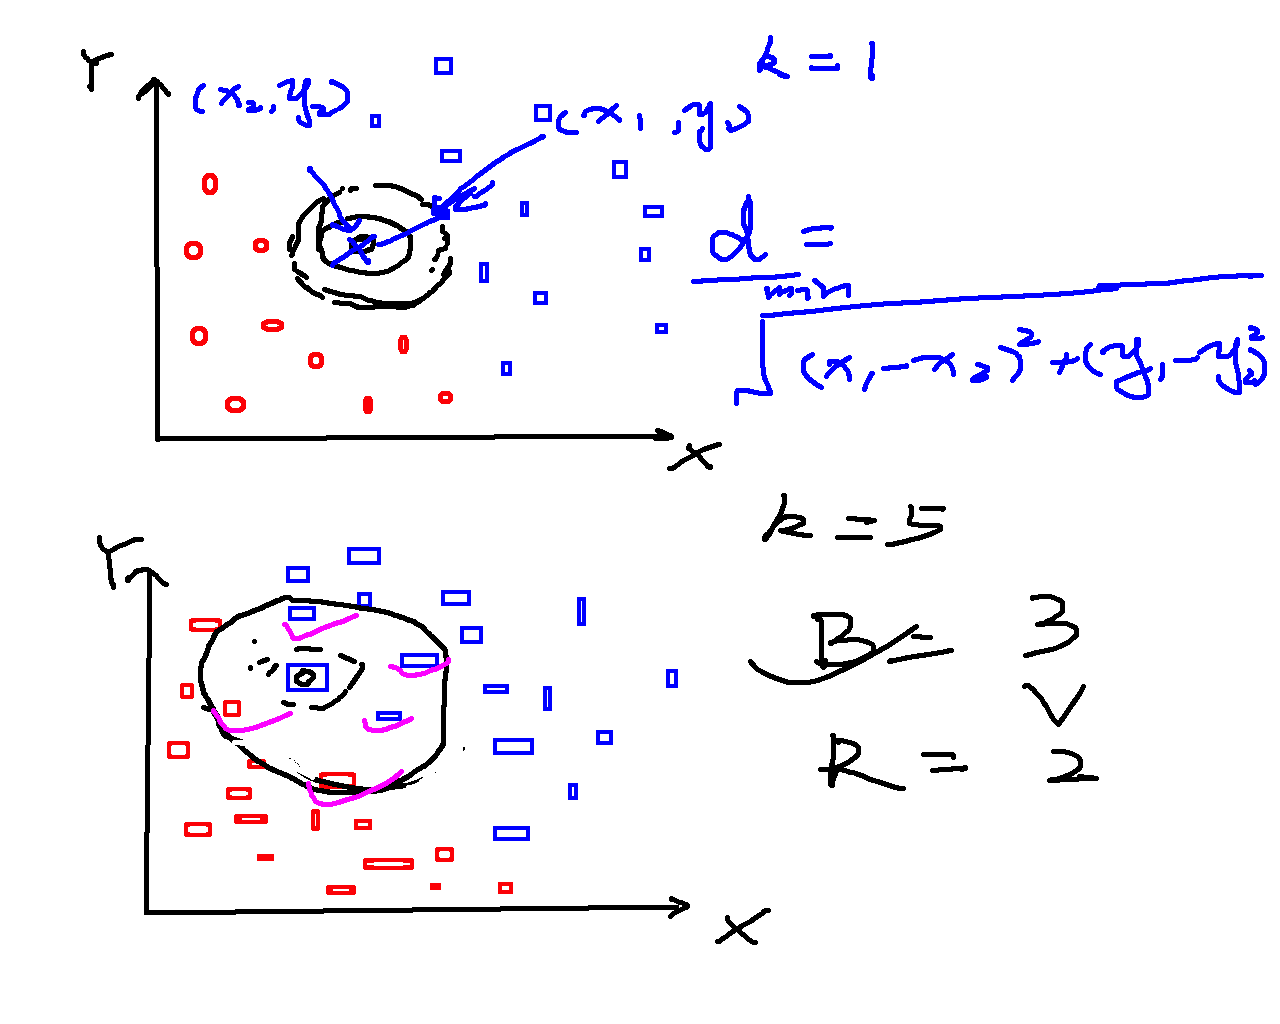

In [6]:
from IPython.display import Image
from math import sqrt
Image(filename='1.knn_pic.png')

1.k——超参数(hyper-parameter)
2.k最好为奇数（no even number , better be odd）
3.k大小有学问：
k太小：outliers 对判断的影像加大
k太大：会"冲淡"周边neighbor（高质量、高权重的数据）对最终判断的影像

In [7]:
# Euclidean Distance

def calculate_euclidean_distance(row1,row2):
    # 累计的计数器
    distance = 0.0
    for i in range(len(row1)-1):
        # 这是一种快速写sum求和的方法+=
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

In [8]:
# 创建dummy data
dataset = [[1.80,1.91,0],
           [1.85,2.11,0],
           [2.31,2.88,0],
           [3.54,-3.21,0],
           [3.66,3.12,0],
           [5.52,2.13,1],
           [6.32,1.46,1],
           [7.35,2.34,1],
           [7.78,3.26,1],
           [8.43,-0.34,1]
           ]


In [9]:
row0 = dataset[0]

for row in dataset:
    distance = calculate_euclidean_distance(row0,row)
    print(distance)

0.0
0.20615528128088298
1.0959014554237987
5.407587262356476
2.218941188945755
3.7264996981081318
4.542345209250394
5.566632734427519
6.130489376876858
7.001385577155425


In [10]:
# 找思路：
# 1.需要一个输入变量k
# 2.需要排序（选前面k个）
# 3.数据类型储存：tuple（元组由于列表是因为当出现空值时，排序不会自动串位置）


lambda 排序

In [11]:
# 基础数据是list of tuples
multi_d_list = [('f',1,6),
                ('c',3,4),
                ('d',4,5),
                ('b',2,3),
                ('a',5,2),
                ('e',6,1)]
print(sorted(multi_d_list,key=lambda x:x[2])) # 这里的x是lambda的一个变量，可以替换

[('e', 6, 1), ('a', 5, 2), ('b', 2, 3), ('c', 3, 4), ('d', 4, 5), ('f', 1, 6)]


In [18]:
def get_our_neighbors(train,test_row,num_of_neighbors):
    distances = list()
    for train_row in train:
        dist = calculate_euclidean_distance(test_row,train_row)
        distances.append((train_row,dist)) # 以tuple的形式放入list里面
    distances.sort(key=lambda every_tuple:every_tuple[1]) # 这个1对应distances中的dist。数据结构是[ ([单个样本],dist距离),  ([],)  ,  ... ]，各tuple均按照dist距离升序排列。
    # print(distances)
    neighbors = list()
    for i in range(num_of_neighbors): # num_of_neighbors就是KNN中的K，选取前K各最近距离循环。
        neighbors.append(distances[i][0]) # 将distances中每个[位置i]tuple（含样本）中的每个样本[位置0]，通过append形式放入neighbors列表中。
        # print(neighbors)
    return neighbors #返回K个最近的样本的list集


In [19]:
neighbors =get_our_neighbors(dataset,dataset[0],3)

[([1.8, 1.91, 0], 0.0), ([1.85, 2.11, 0], 0.20615528128088298), ([2.31, 2.88, 0], 1.0959014554237987), ([3.66, 3.12, 0], 2.218941188945755), ([5.52, 2.13, 1], 3.7264996981081318), ([6.32, 1.46, 1], 4.542345209250394), ([3.54, -3.21, 0], 5.407587262356476), ([7.35, 2.34, 1], 5.566632734427519), ([7.78, 3.26, 1], 6.130489376876858), ([8.43, -0.34, 1], 7.001385577155425)]
[[1.8, 1.91, 0]]
[[1.8, 1.91, 0], [1.85, 2.11, 0]]
[[1.8, 1.91, 0], [1.85, 2.11, 0], [2.31, 2.88, 0]]


In [14]:
for neighbor in neighbors:
    print(neighbor)



[1.8, 1.91, 0]
[1.85, 2.11, 0]
[2.31, 2.88, 0]


In [15]:
def predict_the_class(train, test_row, num_of_neighbors):
    neighbors = get_our_neighbors(train,test_row,num_of_neighbors)
    the_class_values = [row[-1] for row in neighbors]
    prediction = max(set(the_class_values),key=the_class_values.count)
    return prediction

prediction = predict_the_class(dataset,dataset[0],3)

[[1.8, 1.91, 0]]
[[1.8, 1.91, 0], [1.85, 2.11, 0]]
[[1.8, 1.91, 0], [1.85, 2.11, 0], [2.31, 2.88, 0]]


In [16]:
print('Our expectation(the real class) is class 【%d】' %(dataset[0][-1]))
print('Our prediction(the predicted class) is class 【%d】' %(prediction))

Our expectation(the real class) is class 【0】
Our prediction(the predicted class) is class 【0】


In [17]:

def predict_the_class_V2(train,test_row,num_of_neighbors):
    neighbors = get_our_neighbors(train,test_row,num_of_neighbors)
    the_class_values = [row[-1] for row in neighbors]
    prediction = sum(the_class_values) / float(len(the_class_values))
    return prediction


prediction = predict_the_class_V2(dataset,dataset[0],3)

print('Our expectation(the real class) is class 【%d】' %(dataset[0][-1]))
print('Our prediction(the predicted class) is class 【%d】' %(prediction))

[[1.8, 1.91, 0]]
[[1.8, 1.91, 0], [1.85, 2.11, 0]]
[[1.8, 1.91, 0], [1.85, 2.11, 0], [2.31, 2.88, 0]]
Our expectation(the real class) is class 【0】
Our prediction(the predicted class) is class 【0】
